In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [2]:
#pip install graphviz

In [3]:
#pip install pydot

In [4]:
import graphviz
import pydot

In [5]:
df= pd.read_csv("Bike.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


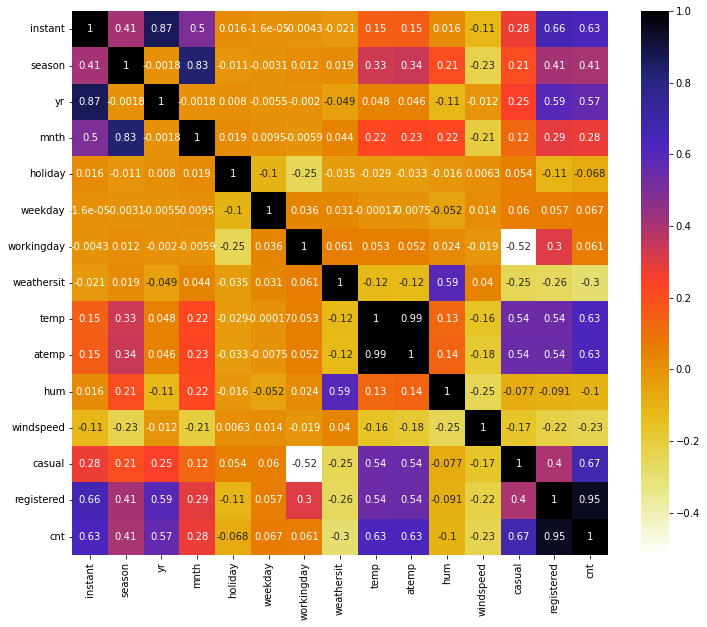

In [6]:
#For Coorelation between the features
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap (cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [7]:
# To find the corelation from the given data set
def correlation(dataset, threshold):
    col_corr = set() # Set of dil the names of correlated
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
             if abs(corr_matrix.iloc[i, j]) > threshold: #
                  colname = corr_matrix.columns[i] # gettir
                  col_corr.add(colname)
    return col_corr


In [8]:
# Fetching data with more than 70% of corelation
corr_features = correlation(df, 0.7)
len(set(corr_features))
corr_features

{'atemp', 'cnt', 'mnth', 'yr'}

<AxesSubplot:>

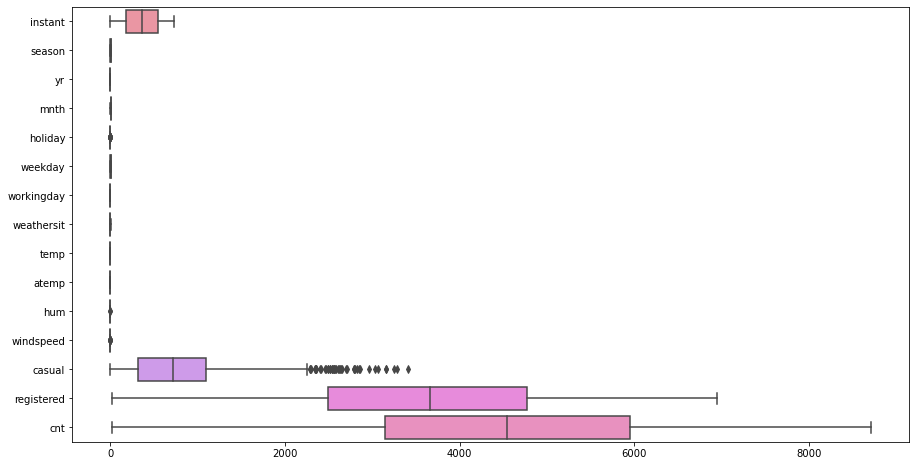

In [9]:
# Plot for outliers
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,orient= "h")

<AxesSubplot:>

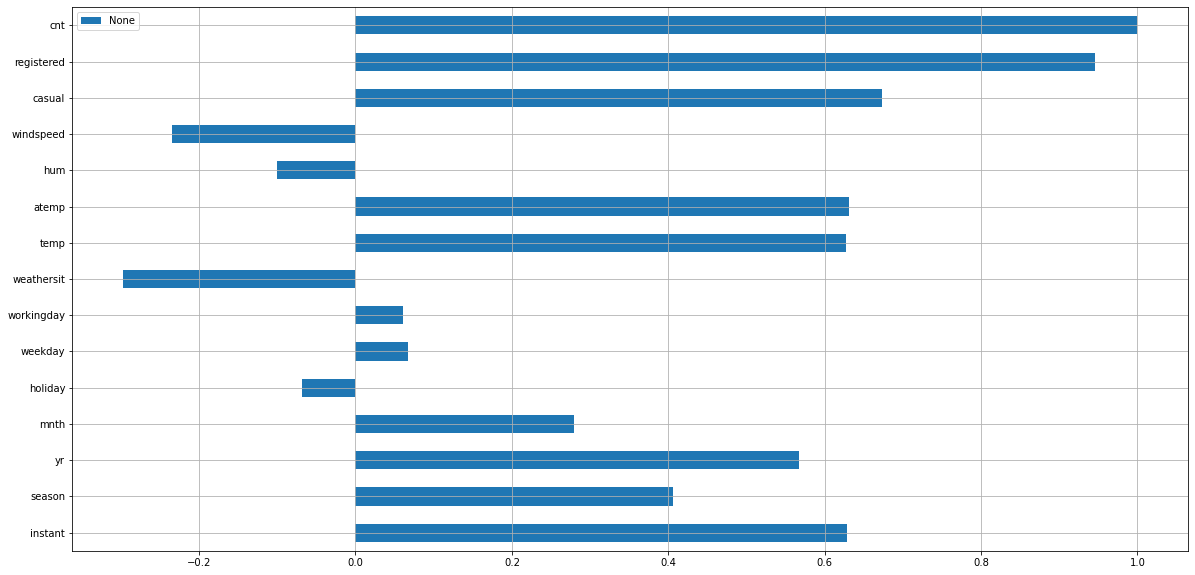

In [10]:
df.corrwith(df['cnt']).plot(kind='barh',figsize=[20,10], legend=True,grid=True)

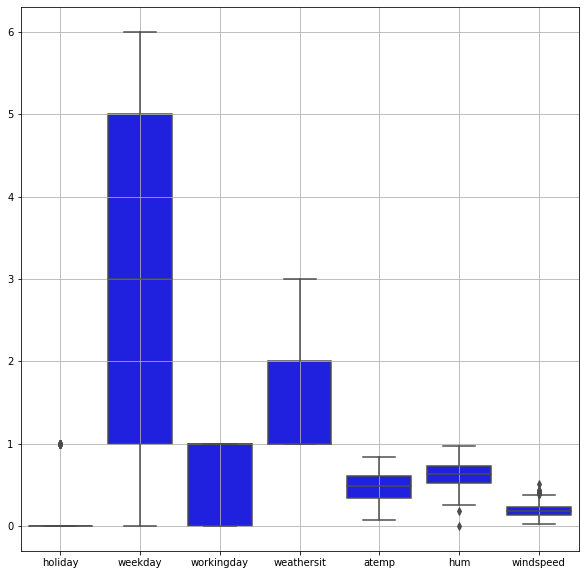

In [11]:
# Plotting the outliers data from features
sns.boxplot(data=df[['holiday','weekday','workingday','weathersit',''
       'atemp', 'hum', 'windspeed',]], color='blue')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.grid()

In [12]:
df = df.drop(['temp','instant','dteday','registered','yr','mnth','season'],axis=1)
df.head()

,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
0,0,6,0,2,0.363625,0.805833,0.160446,331,985
1,0,0,0,2,0.353739,0.696087,0.248539,131,801
2,0,1,1,1,0.189405,0.437273,0.248309,120,1349
3,0,2,1,1,0.212122,0.590435,0.160296,108,1562
4,0,3,1,1,0.229270,0.436957,0.186900,82,1600


In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#X.head()
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

# Linear Regression

In [16]:
lin=LinearRegression()
lin.fit(X_train,y_train)
ypred=lin.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
y_pred= lin.predict(X_test)
r2_score(y_test, y_pred)

0.6827833627822695

# DecisionTree

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=3,max_leaf_nodes=10)
dtr.fit(X_train,y_train)
y_pred= dtr.predict(X_test)

In [19]:
r2_score(y_test , y_pred)

0.7154524135042758

# Lasso Regression

In [20]:
from sklearn import linear_model

In [21]:
Lasso_reg = linear_model.Lasso(alpha=0.1)
Lasso_reg.fit(X_train,y_train)
y_pred= Lasso_reg.predict(X_test)

In [22]:
r2_score(y_test , y_pred)

0.682943353037331